# BASIC PROJECT ANALYSIS

In [57]:
import pandas as pd

## to avoid warnings of deprecated functions merging multiple levels
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [58]:
df = pd.read_csv("../outputs/citations.tsv", \
                 sep="\t", header=None)
df.columns = ['nsfid', 'doi', 'cites']

In [59]:
df.doi = df.doi.str.lower()
df_clean = df.drop_duplicates()
df_clean = df_clean.query('cites>-1')

### PUBLICATION COUNTS BY PROJECT

In [60]:
df_clean

,nsfid,doi,cites
0,1324760,10.1016/j.geomorph.2015.03.039,19
2,1324760,10.2110/sedred.2013.4.9,2
3,1324760,10.2110/sedred.2013.4,0
4,1324760,10.1029/2021ef002088,0
5,1324760,10.1029/2017jf004576,10
...,...,...,...
356,1639694,10.1016/j.dib.2022.107824,2
357,1639694,10.1016/j.cageo.2019.07.003,2
358,1440221,10.1007/978-3-319-33245-1,2
359,1541028,10.3897/biss.2.26644,0


In [61]:
df_nsf_normed = pd.read_csv("../outputs/nsf/nsfid_project_title_normed.csv")
df_nsf_normed.columns = ['nsfid', 'title_normed']

In [62]:
df_project_counts = \
    df_clean \
    .groupby('nsfid') \
    .agg(doi_count=('doi','count'),  \
         total_cites=('cites','sum')) \
    .reset_index() \
    .merge(df_nsf_normed, how='left', on='nsfid')

df_project_counts.sort_values('doi_count', ascending=False)[:10]

,nsfid,doi_count,total_cites,title_normed
24,1440323,16,262,Earthcube Building Blocks: Collaborative Propo...
21,1440294,13,108,Earthcube Building Blocks: Cyberconnector: Bri...
43,1541043,11,29,Earthcube Ia: Collaborative Proposal: Optimal ...
80,1927578,10,42,Earthcube Data Capabilities: Machine Learning ...
76,1740693,8,188,Earthcube Integration: Cyberway--Integrated Ca...
87,1928406,8,34,Collaborative Research: Earthcube Data Capabil...
28,1540542,8,20,Earthcube Ia: Collaborative Proposal: Optimal ...
69,1639759,7,45,Earthcube Building Blocks: Collaborative Propo...
86,1928403,7,30,Earthcube Data Capabilities: Collaborative Pro...
8,1343811,6,57,Earthcube Building Blocks: Earth System Bridge...


In [63]:
df_project_counts.sort_values('total_cites', ascending=False)[:10]

,nsfid,doi_count,total_cites,title_normed
46,1541049,6,556,Earthcube Ia: Collaborative Proposal: Earthcub...
42,1541039,6,556,Earthcube Ia: Collaborative Proposal: Earthcub...
34,1540998,5,546,Earthcube Ia: Collaborative Proposal: Earthcub...
48,1541390,3,400,Earthcube Rcn: Collaborative Research: Engagin...
53,1639588,6,319,Collaborative Proposal: Earthcube Building Blo...
24,1440323,16,262,Earthcube Building Blocks: Collaborative Propo...
32,1540979,3,246,Earthcube Ia: Collaborative Proposal: Building...
40,1541029,4,217,Earthcube Ia: Collaborative Proposal: Linkedea...
33,1540996,1,192,Earthcube Ia: Collaborative Proposal: Linkedea...
76,1740693,8,188,Earthcube Integration: Cyberway--Integrated Ca...


In [64]:
df_project_counts['title_normed'].value_counts()[:3]

Earthcube Data Infrastructure: Collaborative Proposal: A Unified Experimental-Natural Digital Data System For Analysis Of Rock Microstructures    5
Earthcube Building Blocks: Collaborative Proposal: Cloud-Hosted Real-Time Data Services For The Geosciences (Chords)                              4
Earthcube Ia: Collaborative Proposal: Earthcube Integration & Test Environment                                                                    3
Name: title_normed, dtype: int64

In [65]:
df_clean.drop_duplicates().merge(df_nsf_normed)\
    .drop('nsfid', axis=1).drop_duplicates().sort_values('title_normed')

,doi,cites,title_normed
171,10.1093/nar/gkaa637,8,Collaborative Proposal: Earthcube Building Blo...
169,10.1038/nbt.4306,247,Collaborative Proposal: Earthcube Building Blo...
172,10.1093/gigascience/giy165,23,Collaborative Proposal: Earthcube Building Blo...
173,10.1093/gigascience/giz083,17,Collaborative Proposal: Earthcube Building Blo...
174,10.3389/fmicb.2021.765268,1,Collaborative Proposal: Earthcube Building Blo...
...,...,...,...
19,10.2166/hydro.2015.331,7,Title: Earthcube Building Blocks: Integrating ...
20,10.1111/1752-1688.12436,20,Title: Earthcube Building Blocks: Integrating ...
21,10.1111/1752-1688.12474,77,Title: Earthcube Building Blocks: Integrating ...
17,10.1111/1752-1688.12387,5,Title: Earthcube Building Blocks: Integrating ...


In [66]:
df_projects_tmp_a = \
    df_clean.drop_duplicates().merge(df_nsf_normed) \
        .drop('nsfid', axis=1).drop_duplicates().sort_values('title_normed') \
        .groupby('title_normed') \
        .agg(project_dois=('doi', 'count'),
             project_cites=('cites', 'sum'))

df_projects_tmp_b = \
    df_clean.drop_duplicates().merge(df_nsf_normed) \
        .groupby('title_normed') \
        .agg(project_ids=('nsfid', lambda d: d.unique().tolist()),
             project_counts=('nsfid', lambda d: len(d.unique().tolist())))

In [67]:
df_projects_summary = df_projects_tmp_b.merge(df_projects_tmp_a, left_index=True, right_index=True)
df_projects_summary['dois_per_collab'] = df_projects_summary['project_dois'] / df_projects_summary['project_counts']
df_projects_summary['cites_per_collab'] = df_projects_summary['project_cites'] / df_projects_summary['project_counts']
df_projects_summary['cites_per_doi'] = df_projects_summary['project_cites'] / df_projects_summary['project_dois']

In [68]:
df_projects_summary.sort_values(by='project_cites', ascending=False)

,project_ids,project_counts,project_dois,project_cites,dois_per_collab,cites_per_collab,cites_per_doi
title_normed,,,,,,,
Earthcube Ia: Collaborative Proposal: Earthcube Integration & Test Environment,"[1541039, 1540998, 1541049]",3,6,556,2.000000,185.333333,92.666667
Earthcube Rcn: Collaborative Research: Engaging The Greenland Ice Sheet Ocean (Griso) Science Network,[1541390],1,3,400,3.000000,400.000000,133.333333
"Collaborative Proposal: Earthcube Building Blocks: Planet Microbe: Enabling The Discovery And Integration Of Oceanographic Omics, Environmental And Physiochemical Data Layers","[1639588, 1639614]",2,6,319,3.000000,159.500000,53.166667
Earthcube Building Blocks: Collaborative Proposal: Geosoft: Collaborative Open Source Software Sharing For Geosciences,"[1440323, 1440291, 1440332]",3,19,276,6.333333,92.000000,14.526316
Earthcube Ia: Collaborative Proposal: Building Interoperable Cyberinfrastructure (Ci) At The Interface Between Paleogeoinformatics And Bioinformatics,"[1540979, 1541002]",2,9,259,4.500000,129.500000,28.777778
...,...,...,...,...,...,...,...
Earthcube Ia: Oceans Of Data: Bringing Earthcube To The Science User,[1540966],1,1,0,1.000000,0.000000,0.000000
"Collaborative Research: Earthcube Data Capabilities: Volcanology Hub For Interdisciplinary Collaboration, Tools And Resources (Victor)",[2125974],1,1,0,1.000000,0.000000,0.000000
Earthcube Building Blocks: Collaborative Proposal: Polar Data Insights And Search Analytics For The Deep And Scientific Web,[1639675],1,1,0,1.000000,0.000000,0.000000


In [69]:
df_projects_summary.sort_values(by='project_cites', ascending=False)

,project_ids,project_counts,project_dois,project_cites,dois_per_collab,cites_per_collab,cites_per_doi
title_normed,,,,,,,
Earthcube Ia: Collaborative Proposal: Earthcube Integration & Test Environment,"[1541039, 1540998, 1541049]",3,6,556,2.000000,185.333333,92.666667
Earthcube Rcn: Collaborative Research: Engaging The Greenland Ice Sheet Ocean (Griso) Science Network,[1541390],1,3,400,3.000000,400.000000,133.333333
"Collaborative Proposal: Earthcube Building Blocks: Planet Microbe: Enabling The Discovery And Integration Of Oceanographic Omics, Environmental And Physiochemical Data Layers","[1639588, 1639614]",2,6,319,3.000000,159.500000,53.166667
Earthcube Building Blocks: Collaborative Proposal: Geosoft: Collaborative Open Source Software Sharing For Geosciences,"[1440323, 1440291, 1440332]",3,19,276,6.333333,92.000000,14.526316
Earthcube Ia: Collaborative Proposal: Building Interoperable Cyberinfrastructure (Ci) At The Interface Between Paleogeoinformatics And Bioinformatics,"[1540979, 1541002]",2,9,259,4.500000,129.500000,28.777778
...,...,...,...,...,...,...,...
Earthcube Ia: Oceans Of Data: Bringing Earthcube To The Science User,[1540966],1,1,0,1.000000,0.000000,0.000000
"Collaborative Research: Earthcube Data Capabilities: Volcanology Hub For Interdisciplinary Collaboration, Tools And Resources (Victor)",[2125974],1,1,0,1.000000,0.000000,0.000000
Earthcube Building Blocks: Collaborative Proposal: Polar Data Insights And Search Analytics For The Deep And Scientific Web,[1639675],1,1,0,1.000000,0.000000,0.000000


In [70]:
df_projects_summary.to_csv("../outputs/publication_project_summary.csv")
df_projects_summary.to_json("../outputs/publication_project_summary.json")

In [71]:
df_projects_summary.columns

Index(['project_ids', 'project_counts', 'project_dois', 'project_cites',
       'dois_per_collab', 'cites_per_collab', 'cites_per_doi'],
      dtype='object')

In [72]:
df_projects_summary[['project_dois']] \
    .sort_values(by='project_dois',ascending=False)[:5]

,project_dois
title_normed,
Earthcube Building Blocks: Collaborative Proposal: Geosoft: Collaborative Open Source Software Sharing For Geosciences,19
"Earthcube Building Blocks: Cyberconnector: Bridging The Earth Observations And Earth Science Modeling For Supporting Model Validation, Verification, And Inter-Comparison",13
Earthcube Ia: Collaborative Proposal: Optimal Data Layout For Scalable Geophysical Analysis In A Data-Intensive Environment,11
Earthcube Data Capabilities: Machine Learning Enhanced Cyberinfrastructure For Understanding And Predicting The Onset Of Solar Eruptions,10
Earthcube Ia: Collaborative Proposal: Building Interoperable Cyberinfrastructure (Ci) At The Interface Between Paleogeoinformatics And Bioinformatics,9


In [73]:
df_projects_summary[['project_cites', 'project_counts']] \
    .sort_values(by='project_cites',ascending=False)[:5]

,project_cites,project_counts
title_normed,,
Earthcube Ia: Collaborative Proposal: Earthcube Integration & Test Environment,556,3
Earthcube Rcn: Collaborative Research: Engaging The Greenland Ice Sheet Ocean (Griso) Science Network,400,1
"Collaborative Proposal: Earthcube Building Blocks: Planet Microbe: Enabling The Discovery And Integration Of Oceanographic Omics, Environmental And Physiochemical Data Layers",319,2
Earthcube Building Blocks: Collaborative Proposal: Geosoft: Collaborative Open Source Software Sharing For Geosciences,276,3
Earthcube Ia: Collaborative Proposal: Building Interoperable Cyberinfrastructure (Ci) At The Interface Between Paleogeoinformatics And Bioinformatics,259,2


In [74]:
df_projects_summary[['project_dois','cites_per_doi']] \
    .sort_values(by='cites_per_doi',ascending=False)[:5]

,project_dois,cites_per_doi
title_normed,,
Earthcube Rcn: Collaborative Research: Engaging The Greenland Ice Sheet Ocean (Griso) Science Network,3,133.333333
Earthcube Ia: Collaborative Proposal: Earthcube Integration & Test Environment,6,92.666667
Earthcube Ia: Collaborative Proposal: Linkedearth: Crowdsourcing Data Curation & Standards Development In Paleoclimatology,4,54.250000
"Collaborative Proposal: Earthcube Building Blocks: Planet Microbe: Enabling The Discovery And Integration Of Oceanographic Omics, Environmental And Physiochemical Data Layers",6,53.166667
Earthcube Building Blocks: Collaborative Proposal: The Power Of Many: Ensemble Toolkit For Earth Sciences,6,37.500000


In [75]:
df_projects_summary[['project_counts','project_cites','cites_per_collab']] \
    .sort_values(by='cites_per_collab',ascending=False)[:5]

,project_counts,project_cites,cites_per_collab
title_normed,,,
Earthcube Rcn: Collaborative Research: Engaging The Greenland Ice Sheet Ocean (Griso) Science Network,1,400,400.000000
Earthcube Integration: Cyberway--Integrated Capabilities Of Earthcube Building Blocks For Facilitating Cyber-Based Innovative Way Of Interdisciplinary Geoscience Studies,1,188,188.000000
Earthcube Ia: Collaborative Proposal: Earthcube Integration & Test Environment,3,556,185.333333
Earthcube Building Blocks: A Cognitive Computer Infrastructure For Geoscience,1,165,165.000000
"Collaborative Proposal: Earthcube Building Blocks: Planet Microbe: Enabling The Discovery And Integration Of Oceanographic Omics, Environmental And Physiochemical Data Layers",2,319,159.500000


In [76]:
df_projects_summary[['project_counts','project_cites','cites_per_collab']] \
    .query('project_counts>1') \
    .sort_values(by='cites_per_collab',ascending=False)[:5]

,project_counts,project_cites,cites_per_collab
title_normed,,,
Earthcube Ia: Collaborative Proposal: Earthcube Integration & Test Environment,3,556,185.333333
"Collaborative Proposal: Earthcube Building Blocks: Planet Microbe: Enabling The Discovery And Integration Of Oceanographic Omics, Environmental And Physiochemical Data Layers",2,319,159.500000
Earthcube Ia: Collaborative Proposal: Building Interoperable Cyberinfrastructure (Ci) At The Interface Between Paleogeoinformatics And Bioinformatics,2,259,129.500000
Earthcube Ia: Collaborative Proposal: Linkedearth: Crowdsourcing Data Curation & Standards Development In Paleoclimatology,2,217,108.500000
Earthcube Building Blocks: Collaborative Proposal: Geosoft: Collaborative Open Source Software Sharing For Geosciences,3,276,92.000000


### PUBLICATION COUNTS BY PROJECT TYPE

### change input files JSON

In [77]:
df_nsf_title_normed = pd.read_csv("../outputs/nsf/nsfid_project_title_normed.csv",).set_index('Unnamed: 0')
df_nsf = pd.read_json("../outputs/nsf/data_full_dump.json").T

In [78]:
df_nsf_normed = df_nsf_title_normed.merge(df_nsf, left_index=True, right_index=True)
del(df_nsf_title_normed)
del(df_nsf)

In [79]:
from datetime import timedelta
df_nsf_normed.startDate = pd.to_datetime(df_nsf_normed.startDate)
df_nsf_normed.expDate = pd.to_datetime(df_nsf_normed.expDate)
df_nsf_normed.fundsObligatedAmt = pd.to_numeric(df_nsf_normed.fundsObligatedAmt)
df_nsf_normed['proj_duration'] = round((df_nsf_normed.expDate - df_nsf_normed.startDate) / timedelta(days=365)).astype(int)

In [80]:
df_nsf_normed.columns

Index(['title_normed', 'abstractText', 'estimatedTotalAmt',
       'fundsObligatedAmt', 'fundProgramName', 'id', 'projectOutComesReport',
       'publicationResearch', 'startDate', 'expDate', 'title', 'awardee',
       'proj_duration'],
      dtype='object')

In [81]:
df_project_summary_full = \
    df_project_counts \
    .set_index('nsfid') \
    .merge(df_nsf_normed, left_index=True, right_index=True)
df_project_summary_full = df_project_summary_full.drop('title_normed_x', axis=1)
df_project_summary_full = df_project_summary_full.rename(columns={'title_normed_y': 'title_normed'})

In [82]:
df_tmp = df_project_summary_full.query('expDate<=2020')[['proj_duration','doi_count','total_cites']]

In [83]:
(df_tmp.doi_count / df_tmp.proj_duration).describe()

count    52.000000
mean      1.079167
std       0.925621
min       0.250000
25%       0.500000
50%       0.708333
75%       1.375000
max       4.333333
dtype: float64

## CORRELATION ANALYSIS

In [84]:
df_project_summary_full.query('expDate<=2020')[['proj_duration','doi_count','total_cites']].corr()

,proj_duration,doi_count,total_cites
proj_duration,1.000000,0.255790,-0.030888
doi_count,0.255790,1.000000,0.370514
total_cites,-0.030888,0.370514,1.000000


* NO meaningful correlation between number of papers and project duration

In [85]:
df_project_summary_full.query('expDate<=2020')[['fundsObligatedAmt', 'total_cites']].corr()

,fundsObligatedAmt,total_cites
fundsObligatedAmt,1.000000,-0.028323
total_cites,-0.028323,1.000000


* NO correlation between award amount and cites

In [86]:
df_project_summary_full.query('expDate<=2020')[['fundsObligatedAmt', 'doi_count']].corr()

,fundsObligatedAmt,doi_count
fundsObligatedAmt,1.000000,0.249793
doi_count,0.249793,1.000000


* NO correlation between number of papers and amount of funding

In [87]:
df_project_summary_full.columns

Index(['doi_count', 'total_cites', 'title_normed', 'abstractText',
       'estimatedTotalAmt', 'fundsObligatedAmt', 'fundProgramName', 'id',
       'projectOutComesReport', 'publicationResearch', 'startDate', 'expDate',
       'title', 'awardee', 'proj_duration'],
      dtype='object')

In [88]:
#     [[('proj_duration','max'), 'project_counts', 'project_cites', 'project_dois']]\

df_project_summary_full[['doi_count', 'total_cites', 'title_normed', 'proj_duration', 'startDate', 'expDate']]\
    .groupby('title_normed')\
    .agg({'doi_count': ['sum'], 'total_cites': ['sum'], 'proj_duration': ['max'], 'startDate': ['min'], 'expDate': ['max']}).sort_values(by=('doi_count', 'sum'))\
    .merge(df_projects_summary, right_index=True, left_on='title_normed')\
    .sort_values('project_dois').sort_values(('proj_duration', 'max'), ascending=False)\
    .rename(columns={
                ('proj_duration', 'max'): 'award_duration', 
                'project_counts': 'collaborators',
                ('doi_count', 'sum'): 'award_publications',
                ('total_cites', 'sum'): 'award_cites',
                'project_counts': 'collaborators',
                'project_id': 'collaborator_nsfid',
                ('startDate', 'min'): 'project_start',
                ('expDate', 'max'): 'project_end',
        })\
    [['award_publications','award_cites','award_duration','project_start','project_end','project_ids','collaborators']]\
    .reset_index().rename(columns={'title_normed': 'project_title'})\
    .to_csv("../outputs/projects_detailed_outcomes.csv", index=False)

In [89]:
df_tmp = \
    df_project_summary_full[['doi_count', 'total_cites', 'title_normed', 'proj_duration', 'startDate', 'expDate']]\
        .groupby('title_normed')\
        .agg({'doi_count': ['sum'], 'total_cites': ['sum'], 'proj_duration': ['max'], 'startDate': ['min'], 'expDate': ['max']}).sort_values(by=('doi_count', 'sum'))\
        .merge(df_projects_summary, right_index=True, left_on='title_normed')\
        .sort_values('project_dois').sort_values(('proj_duration', 'max'), ascending=False)\
        .rename(columns={
                    ('proj_duration', 'max'): 'award_duration', 
                    'project_counts': 'collaborators',
                    'project_counts': 'collaborators',
                    'project_id': 'collaborator_nsfid',
                    ('startDate', 'min'): 'project_start',
                    ('expDate', 'max'): 'project_end',
            })\
#        .reset_index().rename(columns={'title_normed': 'project_title'})

df_tmp = df_tmp.loc[:, ~df_tmp.columns.isin([('doi_count', 'sum'), ('total_cites', 'sum')])]

In [90]:
df_tmp  = df_tmp.iloc[:,:7]
df_tmp.columns = ['Award Duration', 'Award Start', 'Award End', 'Award IDs', 'Collaborators', 'Publication Count', 'Citation Total']
df_tmp[:3]

,Award Duration,Award Start,Award End,Award IDs,Collaborators,Publication Count,Citation Total
title_normed,,,,,,,
Earthcube Rcn Is-Geo: Intelligent Systems Research To Support Geosciences,6,2016-08-15,2023-01-31,[1632211],1,4,78
Collaborative Proposal: Earthcube Integration: Iceberg: Imagery Cyberinfrastructure And Extensible Building-Blocks To Enhance Research In The Geosciences,5,2017-10-01,2022-09-30,"[1740595, 1740581]",2,4,14
Earthcube Building Blocks: Collaborative Proposal: The Power Of Many: Ensemble Toolkit For Earth Sciences,5,2016-09-01,2021-08-31,"[1639698, 1639707, 1639694]",3,6,225


In [91]:
print("""
| Award Title | Start Date | End Date | Publication Count |
|---:|:--:|:--:|:--:|""")

for r in df_tmp.sort_values('Publication Count', ascending=False)[:5].itertuples():
    print(
        "|",
        r[0], 
        "(" +
        ", ".join([f"[NSF #{d}](https://nsf.gov/awardsearch/showAward?AWD_ID={d}&HistoricalAwards=false)" for d in r[4]])        
        + ") |",
        r[2].date(), "|" ,
        r[3].date(), "|" ,
        r[6], "|"
    )


| Award Title | Start Date | End Date | Publication Count |
|---:|:--:|:--:|:--:|
| Earthcube Building Blocks: Collaborative Proposal: Geosoft: Collaborative Open Source Software Sharing For Geosciences ([NSF #1440323](https://nsf.gov/awardsearch/showAward?AWD_ID=1440323&HistoricalAwards=false), [NSF #1440291](https://nsf.gov/awardsearch/showAward?AWD_ID=1440291&HistoricalAwards=false), [NSF #1440332](https://nsf.gov/awardsearch/showAward?AWD_ID=1440332&HistoricalAwards=false)) | 2014-09-01 | 2018-08-31 | 19 |
| Earthcube Building Blocks: Cyberconnector: Bridging The Earth Observations And Earth Science Modeling For Supporting Model Validation, Verification, And Inter-Comparison ([NSF #1440294](https://nsf.gov/awardsearch/showAward?AWD_ID=1440294&HistoricalAwards=false)) | 2014-09-01 | 2017-08-31 | 13 |
| Earthcube Ia: Collaborative Proposal: Optimal Data Layout For Scalable Geophysical Analysis In A Data-Intensive Environment ([NSF #1541043](https://nsf.gov/awardsearch/showAward?AWD_

| Award Title | Start Date | End Date | Publication Count |
|---:|:--:|:--:|:--:|
| Earthcube Building Blocks: Collaborative Proposal: Geosoft: Collaborative Open Source Software Sharing For Geosciences ([NSF #1440323](https://nsf.gov/awardsearch/showAward?AWD_ID=1440323&HistoricalAwards=false), [NSF #1440291](https://nsf.gov/awardsearch/showAward?AWD_ID=1440291&HistoricalAwards=false), [NSF #1440332](https://nsf.gov/awardsearch/showAward?AWD_ID=1440332&HistoricalAwards=false)) | 2014-09-01 | 2018-08-31 | 19 |
| Earthcube Building Blocks: Cyberconnector: Bridging The Earth Observations And Earth Science Modeling For Supporting Model Validation, Verification, And Inter-Comparison ([NSF #1440294](https://nsf.gov/awardsearch/showAward?AWD_ID=1440294&HistoricalAwards=false)) | 2014-09-01 | 2017-08-31 | 13 |
| Earthcube Ia: Collaborative Proposal: Optimal Data Layout For Scalable Geophysical Analysis In A Data-Intensive Environment ([NSF #1541043](https://nsf.gov/awardsearch/showAward?AWD_ID=1541043&HistoricalAwards=false), [NSF #1540542](https://nsf.gov/awardsearch/showAward?AWD_ID=1540542&HistoricalAwards=false)) | 2015-09-01 | 2019-08-31 | 11 |
| Earthcube Data Capabilities: Machine Learning Enhanced Cyberinfrastructure For Understanding And Predicting The Onset Of Solar Eruptions ([NSF #1927578](https://nsf.gov/awardsearch/showAward?AWD_ID=1927578&HistoricalAwards=false)) | 2019-09-01 | 2023-08-31 | 10 |
| Earthcube Data Infrastructure: Collaborative Proposal: A Unified Experimental-Natural Digital Data System For Analysis Of Rock Microstructures ([NSF #1639749](https://nsf.gov/awardsearch/showAward?AWD_ID=1639749&HistoricalAwards=false), [NSF #1639710](https://nsf.gov/awardsearch/showAward?AWD_ID=1639710&HistoricalAwards=false), [NSF #1639716](https://nsf.gov/awardsearch/showAward?AWD_ID=1639716&HistoricalAwards=false), [NSF #1639738](https://nsf.gov/awardsearch/showAward?AWD_ID=1639738&HistoricalAwards=false), [NSF #1639748](https://nsf.gov/awardsearch/showAward?AWD_ID=1639748&HistoricalAwards=false)) | 2017-09-01 | 2021-08-31 | 9 |

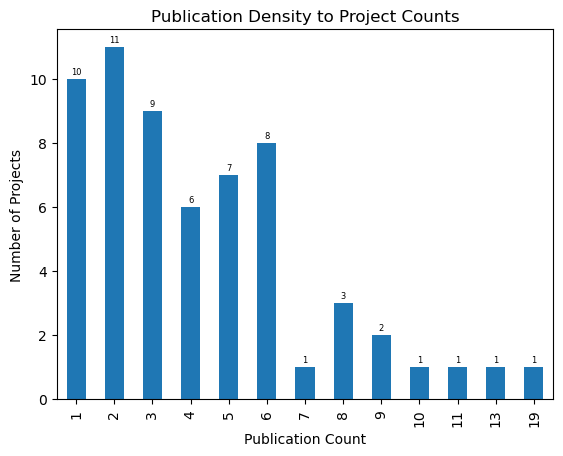

In [92]:
ax = df_tmp['Publication Count'].value_counts().sort_index()\
    .T.plot.bar(ylabel='Number of Projects', xlabel='Publication Count', title='Publication Density to Project Counts')

for container in ax.containers:
    ax.bar_label(container,  padding=2, fontsize=6)
    
ax.get_figure().savefig("../outputs/fig_pub_project_density.png", dpi=300)

In [93]:
print("""
| Award Title | Start Date | End Date | Total Citations |
|---:|:--:|:--:|:--:|""")

for r in df_tmp.sort_values('Citation Total', ascending=False)[:5].itertuples():
    print(
        "|",
        r[0], 
        "(" +
        ", ".join([f"[NSF #{d}](https://nsf.gov/awardsearch/showAward?AWD_ID={d}&HistoricalAwards=false)" for d in r[4]])        
        + ") |",
        r[2].date(), "|" ,
        r[3].date(), "|" ,
        r[7], "|"
    )


| Award Title | Start Date | End Date | Total Citations |
|---:|:--:|:--:|:--:|
| Earthcube Ia: Collaborative Proposal: Earthcube Integration & Test Environment ([NSF #1541039](https://nsf.gov/awardsearch/showAward?AWD_ID=1541039&HistoricalAwards=false), [NSF #1540998](https://nsf.gov/awardsearch/showAward?AWD_ID=1540998&HistoricalAwards=false), [NSF #1541049](https://nsf.gov/awardsearch/showAward?AWD_ID=1541049&HistoricalAwards=false)) | 2015-09-01 | 2018-08-31 | 556 |
| Earthcube Rcn: Collaborative Research: Engaging The Greenland Ice Sheet Ocean (Griso) Science Network ([NSF #1541390](https://nsf.gov/awardsearch/showAward?AWD_ID=1541390&HistoricalAwards=false)) | 2016-08-01 | 2018-07-31 | 400 |
| Collaborative Proposal: Earthcube Building Blocks: Planet Microbe: Enabling The Discovery And Integration Of Oceanographic Omics, Environmental And Physiochemical Data Layers ([NSF #1639588](https://nsf.gov/awardsearch/showAward?AWD_ID=1639588&HistoricalAwards=false), [NSF #1639614](https:

In [94]:
df_eco = pd.read_csv("../outputs/eco_funded_project_list.tsv", sep='\t')

In [95]:
df_project_counts

,nsfid,doi_count,total_cites,title_normed
0,1324760,5,31,Rcn: Building A Sediment Experimentalist Netwo...
1,1340233,2,17,Earthcube Test Enterprise Governance: An Agile...
2,1340265,2,6,Ec3 - Earth-Centered Communication For Cyberin...
3,1340301,3,9,Earthcube Rcn: C4P: Collaboration And Cyberinf...
4,1343760,5,165,Earthcube Building Blocks: A Cognitive Compute...
...,...,...,...,...
91,2026951,1,4,Earthcube Capabilities: Cloud-Based Accessible...
92,2125974,1,0,Collaborative Research: Earthcube Data Capabil...
93,2126315,3,17,Earthcube Capabilities: Openmindat - Open Acce...
94,2126449,1,0,Collaborative Research: Earthcube Capabilities...


In [96]:
df_eco.merge(df_project_counts)

,nsfid,shortname,program,doi_count,total_cites,title_normed
0,1324760,RCN,Building a Sediment Experimentalist Network (SEN),5,31,Rcn: Building A Sediment Experimentalist Netwo...
1,1340233,Office,EarthCube Test Enterprise Governance: An Agile...,2,17,Earthcube Test Enterprise Governance: An Agile...
2,1340265,BB,EC3: Earth-Centered Communication for Cyberinf...,2,6,Ec3 - Earth-Centered Communication For Cyberin...
3,1340301,RCN,C4P: Collaboration and Cyberinfrastructure for...,3,9,Earthcube Rcn: C4P: Collaboration And Cyberinf...
4,1343760,BB,A Cognitive Computer Infrastructure for Geosci...,5,165,Earthcube Building Blocks: A Cognitive Compute...
...,...,...,...,...,...,...
91,2026951,DC,Cloud-Based Accessible and Reproducible Modeli...,1,4,Earthcube Capabilities: Cloud-Based Accessible...
92,2126315,DC,OpenMindat - Open Access and Interoperable Min...,3,17,Earthcube Capabilities: Openmindat - Open Acce...
93,2125974,DC,Volcanology hub for Interdisciplinary Collabor...,1,0,Collaborative Research: Earthcube Data Capabil...
94,2126474,DC,ICESpark: An Open-Source Big Data Platform for...,5,4,Collaborative Research: Earthcube Capabilities...


In [97]:
df_eco.merge(df_project_counts).\
    groupby('shortname').agg({'total_cites': 'sum'})

## TODO/NOTE: these are wrong as they include dupes

,total_cites
shortname,
BB,2126
DC,226
DI,161
IA,2941
Office,17
RCN,670


### PROJECT ANALYSIS

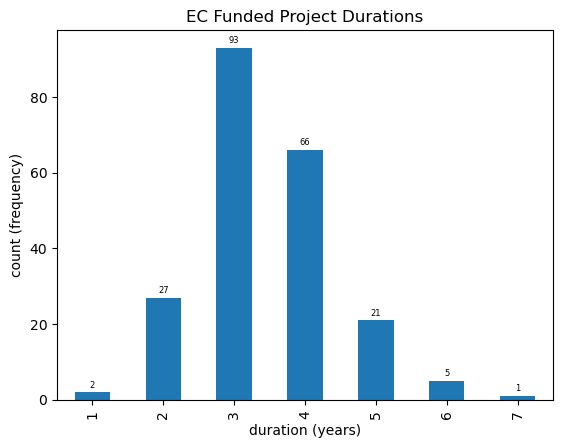

In [98]:
df_tmp = pd.read_json("../outputs/nsf/data_full_dump.json").T[['startDate','expDate']] 

df_tmp.startDate, df_tmp.expDate = pd.to_datetime(df_tmp.startDate), pd.to_datetime(df_tmp.expDate)
df_tmp.loc[:,'duration'] = \
    df_tmp.expDate.dt.year - df_tmp.startDate.dt.year

ax = \
    df_tmp.duration.value_counts().sort_index()\
        .plot(kind='bar', title='EC Funded Project Durations', ylabel='count (frequency)', xlabel='duration (years)')

for container in ax.containers:
    ax.bar_label(container,  padding=2, fontsize=6)
    
ax.get_figure().savefig("../outputs/fig_ec_project_duration.png", dpi=300)

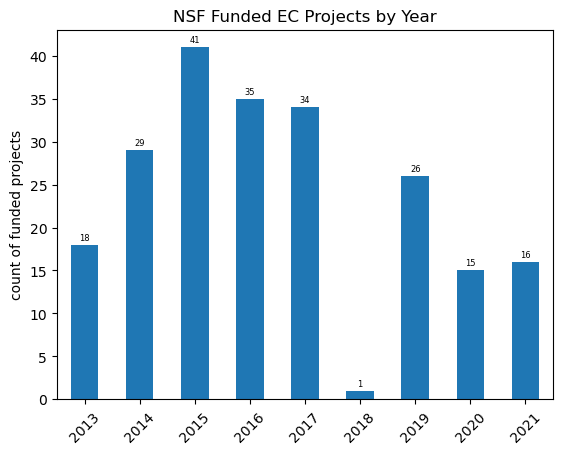

In [99]:
ax = pd.to_datetime(pd.read_json("../outputs/nsf/data_full_dump.json").T.startDate) \
    .dt.year.value_counts() \
    .sort_index() \
    .plot(kind='bar', rot=45, title='NSF Funded EC Projects by Year', ylabel='count of funded projects')\
#    .get_figure().savefig("../outputs/fig_funded_projects_by_year.png", dpi=300)


for container in ax.containers:
    ax.bar_label(container,  padding=2, fontsize=6)
    
ax.get_figure().savefig("../outputs/fig_funded_projects_by_year.png", dpi=300)

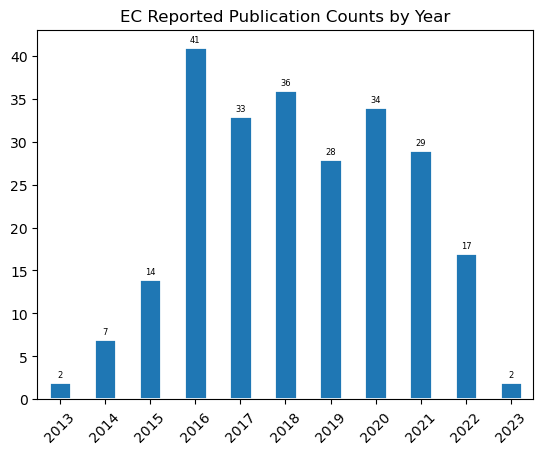

In [100]:
df_pubs = pd.read_csv("../outputs/full_nsf_doi_project_summary.tsv",sep='\t').query('cites>-1')\
    .drop_duplicates(subset='doi')
ax = df_pubs.query('year != "None"').year.value_counts().sort_index()\
    .plot.bar(rot=45, title='EC Reported Publication Counts by Year', edgecolor='white', linewidth=2)

for container in ax.containers:
    ax.bar_label(container,  padding=2, fontsize=6)
    
ax.get_figure().savefig("../outputs/fig_publications_by_year.png", dpi=300)

In [101]:
df_pubs

,nsfid,doi,title,ams_bib,cites,year
0,1324760,10.1016/j.geomorph.2015.03.039,"Data management, sharing, and reuse in experim...","Hsu, L., R. L. Martin, B. McElroy, K. Litwin-M...",19,2015
2,1324760,10.2110/sedred.2013.4.9,Building a Sediment Experimentalist Network (S...,"Hsu, L., B. McElroy, R. L. Martin, and W. Kim,...",2,2013
3,1324760,10.1029/2021ef002088,Earthcasting: Geomorphic Forecasts for Society,"Ferdowsi, B., J. D. Gartner, K. N. Johnson, A....",0,2021
4,1324760,10.1029/2017jf004576,Laboratory Investigation on Effects of Flood I...,"Miller, K. L., W. Kim, and B. McElroy, 2019: L...",10,2019
5,1340233,10.1126/science.342.6162.1041-b,Open Data: Crediting a Culture of Cooperation,"Bolukbasi, B., and Coauthors, 2013: Open Data:...",10,2013
...,...,...,...,...,...,...
354,1639694,10.1016/j.dib.2022.107824,A new hourly dataset for photovoltaic energy p...,"Hu, W., G. Cervone, A. Merzky, M. Turilli, and...",2,2022
355,1639694,10.1016/j.cageo.2019.07.003,Dynamically Optimized Unstructured Grid (DOUG)...,"Hu, W., and G. Cervone, 2019: Dynamically Opti...",2,2019
356,1440221,10.1007/978-3-319-33245-1,Ontology Engineering,"Tamma, V., M. Dragoni, R. Gonçalves, and A. Ła...",2,2016
357,1541028,10.3897/biss.2.26644,The ePANDDA project: linking the Paleobiology ...,"Sessa, J., S. Butts, T. Karim, G. Nelson, C. N...",0,2018


### FUNDED PROJECTS

In [102]:
df = pd.read_csv("../outputs/citations.tsv", \
                 sep="\t", header=None)

df.columns = ['nsfid', 'doi', 'cites']
df.doi = df.doi.str.lower()

df_clean = df.drop_duplicates(subset='doi')
df_clean = df_clean.query('cites>-1')

In [103]:
df_clean

,nsfid,doi,cites
0,1324760,10.1016/j.geomorph.2015.03.039,19
2,1324760,10.2110/sedred.2013.4.9,2
3,1324760,10.2110/sedred.2013.4,0
4,1324760,10.1029/2021ef002088,0
5,1324760,10.1029/2017jf004576,10
...,...,...,...
356,1639694,10.1016/j.dib.2022.107824,2
357,1639694,10.1016/j.cageo.2019.07.003,2
358,1440221,10.1007/978-3-319-33245-1,2
359,1541028,10.3897/biss.2.26644,0


In [104]:
df = pd.read_csv("../outputs/full_nsf_doi_project_summary.tsv",sep='\t').query('cites>-1')\
    .drop_duplicates(subset='doi')

In [105]:
set(df_clean.doi).difference(set(df.doi))

{'10.2110/sedred.2013.4'}

In [106]:
# graph
df_pubs = pd.read_csv("../outputs/full_nsf_doi_project_summary.tsv",sep='\t').query('cites>-1')\
    .drop_duplicates(subset='doi')

In [107]:
df_funded = pd.to_datetime(
   pd.read_json("../outputs/nsf/data_full_dump.json").T.startDate
).dt.year

df_funded.value_counts().sort_index()

2013    18
2014    29
2015    41
2016    35
2017    34
2018     1
2019    26
2020    15
2021    16
Name: startDate, dtype: int64

In [108]:
df_pub_counts = pd.DataFrame(df_pubs.query('year != "None"').year.value_counts())
df_pub_counts.index = df_pub_counts.index.astype(int)

In [109]:
df_tmp = pd.concat([df_funded.value_counts(), df_pub_counts], axis=1) 
df_tmp.columns = ['Funded Projects', 'CumPublication Count']
# df_tmp.loc[:,'Cummulative Publication Count'] = df_tmp.iloc[:,1].sort_index().cumsum()

In [110]:
df_tmp.sort_index().cumsum()

,Funded Projects,CumPublication Count
2013,18.0,2
2014,47.0,9
2015,88.0,23
2016,123.0,64
2017,157.0,97
2018,158.0,133
2019,184.0,161
2020,199.0,195
2021,215.0,224
2022,NaN,241


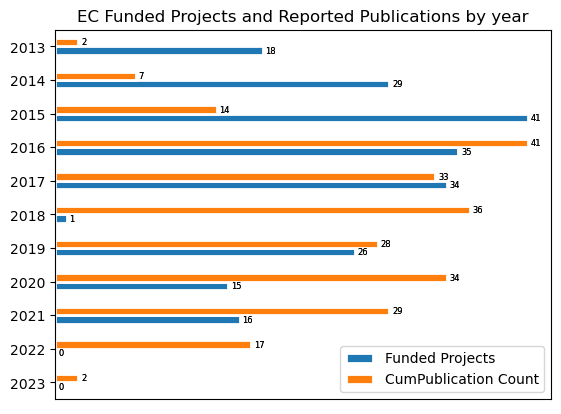

In [111]:
#ax = df_tmp.sort_index().plot(kind='bar')
ax = df_tmp.sort_index().sort_index(ascending=False)\
 .plot.barh(title='EC Funded Projects and Reported Publications by year', edgecolor='white', linewidth=2)


for container in ax.containers:
    ax.bar_label(container,  padding=2, fontsize=6)
    
for container in ax.containers:
    ax.bar_label(container,  padding=2, fontsize=6)

ax.get_xaxis().set_visible(False)
ax.get_figure().savefig("../outputs/figh_v4_projects_publications_by_year.png", dpi=300)
### NOTE: THERE IS A DISCREPANCY OF 2 in cummulative sum

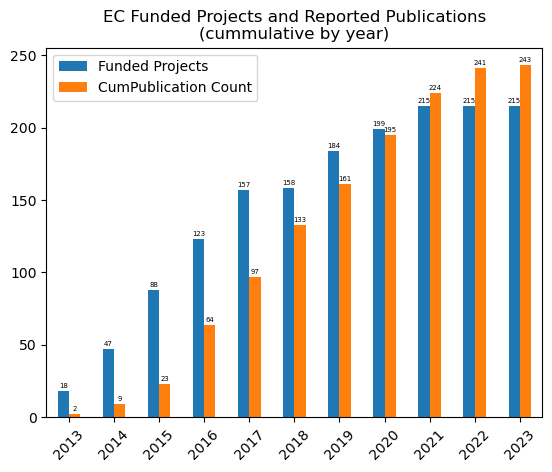

In [112]:
ax = df_tmp.sort_index().cumsum().fillna(df_tmp['Funded Projects'].sum())\
    .plot(title='EC Funded Projects and Reported Publications\n(cummulative by year)', rot=45, kind='bar')

for container in ax.containers:
    ax.bar_label(container,  padding=1.5, fontsize=5)
    
ax.get_figure().savefig("../outputs/fig_cumm_projects_publications_by_year.png", dpi=300)
### NOTE: THERE IS A DISCREPANCY OF 2 in cummulative sum